**Data building and pre processing**

In [ ]:
words=["account","accountnumber","confirm","details","mailbox","clickhere","payment","credit",
       "creditdetails","bankbalance","password","username",
       "won","recently","identity","luckydraw","shortlisted","credited","blocked","risk","profile","re-login","congratulations","amount","loan","bankname",
       "ifsccode","locked","temporarily","renewal","suspended","click","urgent","confidental","access",
       "suspicious","activity","expired","money"
      ,"otp","invest","earn","more","credentials","offers","card","recover","selected","paypal","easy","terms","lottery","prosperous","hurry-up","verify"
      ,"inconvenience","complication","avoid","pay","prize","vouchers","claim","free","cash","reply","congrats","awarded","rs","text","msg","stop","selected",
       "urgent","cash","call","cash"
      ,"phone","noxia","motorola","sony","txt","pounds","dollars","vodafone","transaction","euro","donate","job","deal","bonus",
       "label","invoice","post","document","postal","calculations",
       "copy","fedex","statement","financial","dhl","usps","notification","delivery","ticket","Payment Status",
       "Hello","Follow up","Invoice Due","Direct Deposit","Payroll","Expenses","purchase","important","Required"]

In [ ]:
len(words)

115

In [ ]:
finalwords=[]
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
for i in words:
  finalwords.append(stemmer.stem(i))
finalwords

['account',
 'accountnumb',
 'confirm',
 'detail',
 'mailbox',
 'clickher',
 'payment',
 'credit',
 'creditdetail',
 'bankbal',
 'password',
 'usernam',
 'won',
 'recent',
 'ident',
 'luckydraw',
 'shortlist',
 'credit',
 'block',
 'risk',
 'profil',
 're-login',
 'congratul',
 'amount',
 'loan',
 'banknam',
 'ifsccod',
 'lock',
 'temporarili',
 'renew',
 'suspend',
 'click',
 'urgent',
 'confident',
 'access',
 'suspici',
 'activ',
 'expir',
 'money',
 'otp',
 'invest',
 'earn',
 'more',
 'credenti',
 'offer',
 'card',
 'recov',
 'select',
 'paypal',
 'easi',
 'term',
 'lotteri',
 'prosper',
 'hurry-up',
 'verifi',
 'inconveni',
 'complic',
 'avoid',
 'pay',
 'prize',
 'voucher',
 'claim',
 'free',
 'cash',
 'repli',
 'congrat',
 'award',
 'rs',
 'text',
 'msg',
 'stop',
 'select',
 'urgent',
 'cash',
 'call',
 'cash',
 'phone',
 'noxia',
 'motorola',
 'soni',
 'txt',
 'pound',
 'dollar',
 'vodafon',
 'transact',
 'euro',
 'donat',
 'job',
 'deal',
 'bonu',
 'label',
 'invoic',
 'post

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FinalDataset.xlsx to FinalDataset.xlsx


In [ ]:
import pandas as pd
df=pd.read_excel('FinalDataset.xlsx')

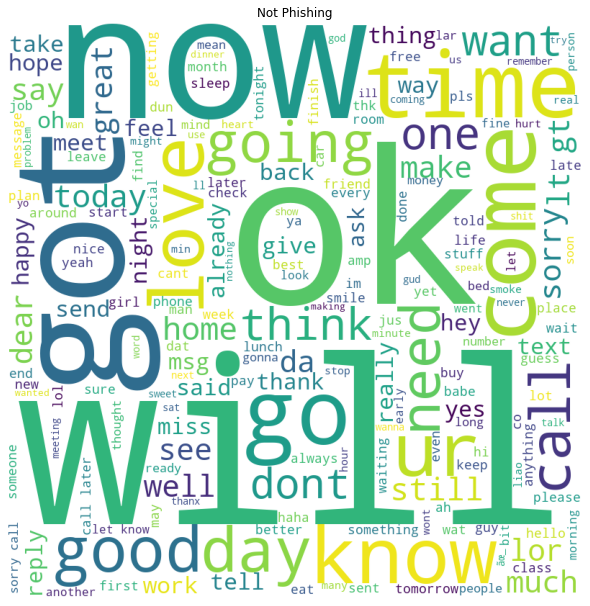

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
comment_words = ''
stopwords = set(STOPWORDS)
for val in df[df['Phishing']==0]['Text']:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)			
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Not Phishing')
plt.show()

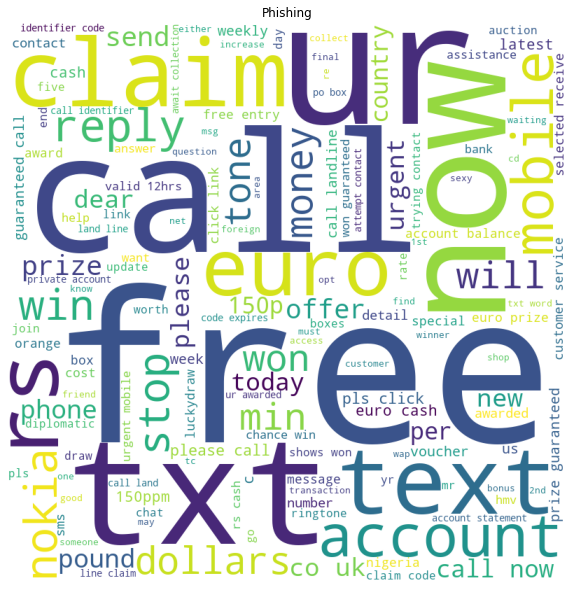

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df[df['Phishing']==1]['Text']:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)			
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Phishing')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df.shape

(2001, 3)

In [ ]:
df.head()

,Sl.No,Text,Phishing
0,0,"Go until jurong point, crazy.. Available only ...",0
1,1,Ok lar... Joking wif u oni...,0
2,2,"Dear user,\nYour account was accessed from a d...",1
3,3,U dun say so early hor... U c already then say...,0
4,4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer

In [ ]:
import numpy as np
datalist=[]
for i in range(0,df.shape[0]):
  ans=df.loc[i,"Text"]
  bef=df.loc[i,"Phishing"]
  tokens=word_tokenize(ans)
  if np.isnan(bef):
    print(i)
  finaltokens=[]
  for j in tokens:
    k=j.lower()
    finaltokens.append(stemmer.stem(k))
  lst=[]
  for j in finalwords:
    lst.append(finaltokens.count(j))
  datalist.append(lst)


In [ ]:
resultant_df=pd.DataFrame(datalist,columns=words)


In [ ]:
resultant_df['Phishing']=df.Phishing


In [ ]:
cols=resultant_df.columns

In [ ]:
cols

Index(['account', 'accountnumber', 'confirm', 'details', 'mailbox',
       'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance',
       ...
       'Hello', 'Follow up', 'Invoice Due', 'Direct Deposit', 'Payroll',
       'Expenses', 'purchase', 'important', 'Required', 'Phishing'],
      dtype='object', length=116)

In [ ]:
cols_to_keep=['account', 'accountnumber', 'confirm', 'details', 'mailbox',
       'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance',
       'password', 'username', 'won', 'recently', 'identity', 'luckydraw',
       'shortlisted', 'credited', 'blocked', 'risk', 'profile', 're-login',
       'congratulations', 'amount', 'loan', 'bankname', 'ifsccode', 'locked',
       'temporarily', 'renewal', 'suspended', 'click', 'urgent', 'confidental',
       'access', 'suspicious', 'activity', 'expired', 'money', 'otp', 'invest',
       'earn', 'more', 'credentials', 'offers', 'card', 'recover', 'selected',
       'paypal', 'easy', 'terms', 'lottery', 'prosperous', 'hurry-up',
       'verify', 'inconvenience', 'complication', 'avoid', 'pay', 'prize',
       'vouchers', 'claim', 'free', 'cash', 'reply', 'congrats', 'awarded',
       'rs', 'text', 'msg', 'stop', 'selected', 'urgent', 'cash', 'call',
       'cash', 'phone', 'noxia', 'motorola', 'sony', 'txt', 'pounds',
       'dollars', 'vodafone', 'transaction', 'euro', 'donate', 'job', 'deal',
       'bonus'] 

In [ ]:
resultant_df.head()

,account,accountnumber,confirm,details,mailbox,clickhere,payment,credit,creditdetails,bankbalance,...,Hello,Follow up,Invoice Due,Direct Deposit,Payroll,Expenses,purchase,important,Required,Phishing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X=resultant_df[cols_to_keep]
y=resultant_df.Phishing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
resultant_df.describe()

,account,accountnumber,confirm,details,mailbox,clickhere,payment,credit,creditdetails,bankbalance,...,Hello,Follow up,Invoice Due,Direct Deposit,Payroll,Expenses,purchase,important,Required,Phishing
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.0,2001.0,...,2001.000000,2001.0,2001.0,2001.0,2001.0,2001.000000,2001.000000,2001.000000,2001.0,2001.000000
mean,0.027986,0.001000,0.003998,0.007996,0.000500,0.000500,0.001999,0.005997,0.0,0.0,...,0.011494,0.0,0.0,0.0,0.0,0.000500,0.001000,0.004498,0.0,0.119440
std,0.245390,0.031607,0.063119,0.089084,0.022355,0.022355,0.054736,0.083451,0.0,0.0,...,0.119866,0.0,0.0,0.0,0.0,0.022355,0.031607,0.066931,0.0,0.324387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.0,0.0,...,3.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000


**Trying out different models**



```
# This is formatted as code
```

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(X_test) 

In [ ]:
from sklearn.metrics import confusion_matrix  
cml= confusion_matrix(y_test, y_pred)
cml

array([[586,   5],
       [ 21,  49]])

In [ ]:
accuracy=(cml[0][0]+cml[1][1])/(sum(cml[0])+sum(cml[1]))
print(accuracy)

0.9606656580937972


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       591
           1       0.91      0.70      0.79        70

    accuracy                           0.96       661
   macro avg       0.94      0.85      0.88       661
weighted avg       0.96      0.96      0.96       661



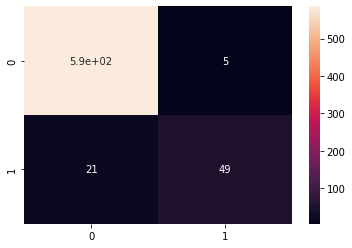

In [ ]:
import seaborn as sns
sns.heatmap(cml, annot=True)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cmd=confusion_matrix(y_test, y_pred)
cmd


array([[582,   9],
       [ 23,  47]])

In [ ]:
accuracy=(cmd[0][0]+cmd[1][1])/(sum(cmd[0])+sum(cmd[1]))
print(accuracy)

0.9515885022692889


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       591
           1       0.84      0.67      0.75        70

    accuracy                           0.95       661
   macro avg       0.90      0.83      0.86       661
weighted avg       0.95      0.95      0.95       661



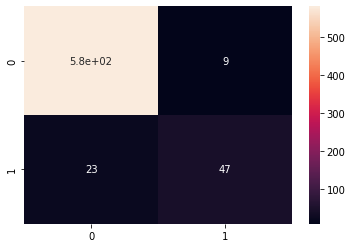

In [ ]:
sns.heatmap(cmd, annot=True)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cmk= confusion_matrix(y_test, y_pred)
cmk

array([[590,   1],
       [ 45,  25]])

In [ ]:
accuracy=(cmk[0][0]+cmk[1][1])/(sum(cmk[0])+sum(cmk[1]))
print(accuracy)

0.9304084720121029


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       591
           1       0.96      0.36      0.52        70

    accuracy                           0.93       661
   macro avg       0.95      0.68      0.74       661
weighted avg       0.93      0.93      0.92       661



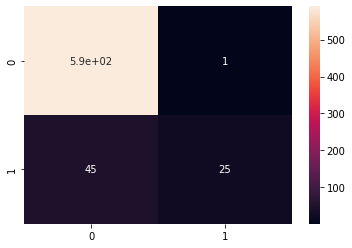

In [ ]:
sns.heatmap(cmk, annot=True)

**SVM**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cms= confusion_matrix(y_test, y_pred)
cms

array([[584,   7],
       [ 21,  49]])

In [ ]:
accuracy=(cms[0][0]+cms[1][1])/(sum(cms[0])+sum(cms[1]))
print(accuracy)

0.9576399394856279


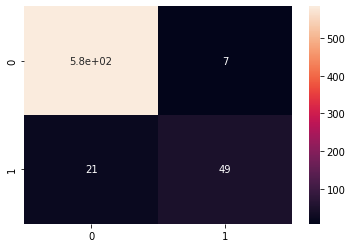

In [ ]:
sns.heatmap(cms, annot=True)

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       591
           1       0.88      0.70      0.78        70

    accuracy                           0.96       661
   macro avg       0.92      0.84      0.88       661
weighted avg       0.96      0.96      0.96       661



**Naïve Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cmn= confusion_matrix(y_test, y_pred)
cmn

array([[582,   9],
       [ 23,  47]])

In [ ]:
accuracy=(cmn[0][0]+cmn[1][1])/(sum(cmn[0])+sum(cmn[1]))
print(accuracy)

0.9515885022692889


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       591
           1       0.84      0.67      0.75        70

    accuracy                           0.95       661
   macro avg       0.90      0.83      0.86       661
weighted avg       0.95      0.95      0.95       661



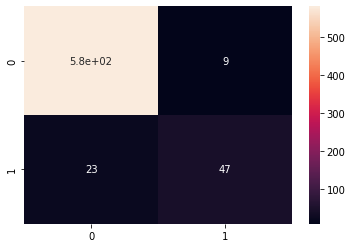

In [ ]:
sns.heatmap(cmn, annot=True)

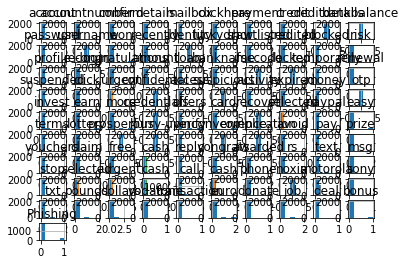

In [ ]:
import matplotlib.pyplot as plt
resultant_df.hist(bins=5)
plt.show()


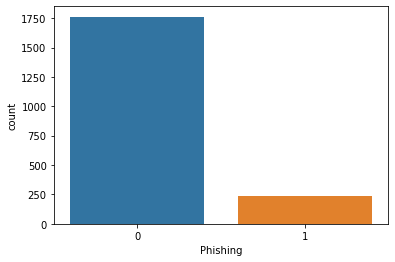

In [ ]:
import seaborn as sns
sns.countplot(x="Phishing",data=df)

**Dimensionality reduction using PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.75)

In [ ]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [ ]:
X_train.shape

(1340, 100)

In [ ]:
X_train_pca.shape

(1340, 29)

In [ ]:
X_test_pca.shape

(661, 29)

**Predictions after PCA**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(X_test_pca) 

In [ ]:
from sklearn.metrics import confusion_matrix  
cml= confusion_matrix(y_test, y_pred)
cml

array([[585,   6],
       [ 14,  56]])

In [ ]:
accuracy=(cml[0][0]+cml[1][1])/(sum(cml[0])+sum(cml[1]))
print(accuracy)

0.9697428139183056


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       591
           1       0.90      0.80      0.85        70

    accuracy                           0.97       661
   macro avg       0.94      0.89      0.92       661
weighted avg       0.97      0.97      0.97       661



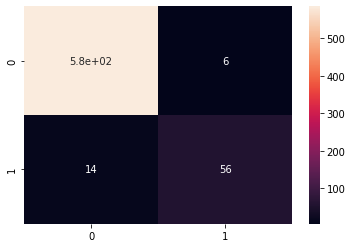

In [ ]:
import seaborn as sns
sns.heatmap(cml,annot=True)

**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_pca,y_train)
y_pred=clf.predict(X_test_pca)
from sklearn.metrics import confusion_matrix
cmd=confusion_matrix(y_test, y_pred)
cmd

array([[583,   8],
       [ 18,  52]])

In [ ]:
accuracy=(cmd[0][0]+cmd[1][1])/(sum(cmd[0])+sum(cmd[1]))
print(accuracy)

0.9606656580937972


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       591
           1       0.87      0.74      0.80        70

    accuracy                           0.96       661
   macro avg       0.92      0.86      0.89       661
weighted avg       0.96      0.96      0.96       661



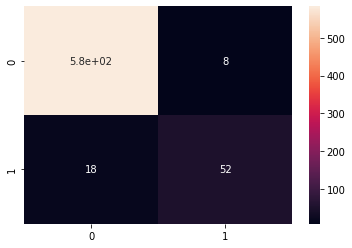

In [ ]:
sns.heatmap(cmd, annot=True)

**K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train_pca, y_train)
y_pred= classifier.predict(X_test_pca)
from sklearn.metrics import confusion_matrix  
cmk= confusion_matrix(y_test, y_pred)
cmk

array([[581,  10],
       [ 36,  34]])

In [ ]:
accuracy=(cmk[0][0]+cmk[1][1])/(sum(cmk[0])+sum(cmk[1]))
print(accuracy)

0.9304084720121029


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       591
           1       0.77      0.49      0.60        70

    accuracy                           0.93       661
   macro avg       0.86      0.73      0.78       661
weighted avg       0.92      0.93      0.92       661



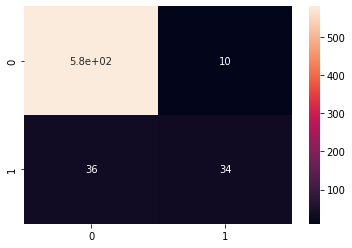

In [ ]:
sns.heatmap(cmk, annot=True)

**SVM**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train_pca, y_train)
y_pred= classifier.predict(X_test_pca)  
from sklearn.metrics import confusion_matrix  
cms= confusion_matrix(y_test, y_pred)
cms

array([[584,   7],
       [ 19,  51]])

In [ ]:
ccuracy=(cms[0][0]+cms[1][1])/(sum(cms[0])+sum(cms[1]))
print(accuracy)

0.9304084720121029


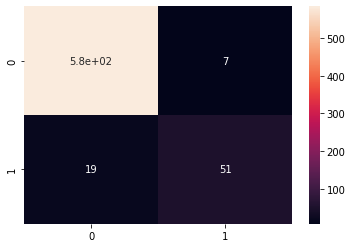

In [ ]:
sns.heatmap(cms, annot=True)

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       591
           1       0.88      0.73      0.80        70

    accuracy                           0.96       661
   macro avg       0.92      0.86      0.89       661
weighted avg       0.96      0.96      0.96       661



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train_pca, y_train) 
y_pred= classifier.predict(X_test_pca)
from sklearn.metrics import confusion_matrix  
cmn= confusion_matrix(y_test, y_pred)
cmn

array([[569,  22],
       [ 19,  51]])

In [ ]:
accuracy=(cmn[0][0]+cmn[1][1])/(sum(cmn[0])+sum(cmn[1]))
print(accuracy)

0.9379727685325264


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       591
           1       0.70      0.73      0.71        70

    accuracy                           0.94       661
   macro avg       0.83      0.85      0.84       661
weighted avg       0.94      0.94      0.94       661



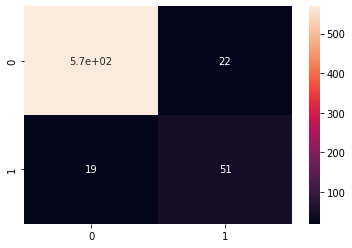

In [ ]:
sns.heatmap(cmn, annot=True)

**Dimensionality reduction using Backward Feature Elimination**

In this method, we check accuracy for every 10 feautures and try to grab the best features which give the highest accuracy for every ML Algorithm

**Logistic regression**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  
logr=LogisticRegression()
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(logr,n_features_to_select=i,direction='backward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  logr.fit(X_train_sfs, y_train)
  y_pred = logr.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9546142208774584
['account', 'creditdetails', 'bankbalance', 'password', 'username', 'won', 'recently', 'identity', 'luckydraw', 'shortlisted', 'credited', 'blocked', 'risk', 'profile', 're-login', 'congratulations', 'amount', 'loan', 'bankname', 'ifsccode', 'locked', 'temporarily', 'renewal', 'suspended', 'click', 'urgent', 'urgent', 'confidental', 'access', 'suspicious', 'activity', 'expired', 'money', 'otp', 'invest', 'earn', 'more', 'credentials', 'offers', 'card', 'recover', 'selected', 'selected', 'paypal', 'easy', 'terms', 'lottery', 'prosperous', 'hurry-up', 'verify', 'inconvenience', 'complication', 'avoid', 'pay', 'vouchers', 'claim', 'free', 'cash', 'cash', 'cash', 'reply', 'congrats', 'awarded', 'rs', 'msg', 'stop', 'selected', 'selected', 'urgent', 'urgent', 'cash', 'cash', 'cash', 'call', 'cash', 'cash', 'cash', 'phone', 'noxia', 'motorola', 'sony', 'txt', 'pounds', 'vodafone', 'transaction', 'euro', 'donate', 'job', 'deal', 'bonus']


In [ ]:
print(len(ftrs))

90


so in backward feauture elimination , for logistic regression , we got 90 optimal features

**Decision Tree**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
from sklearn.metrics import accuracy_score
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='backward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)


0.9606656580937972
['accountnumber', 'won', 'click', 'expired', 'more', 'verify', 'pay', 'reply', 'rs', 'stop', 'selected', 'urgent', 'cash', 'cash', 'cash', 'call', 'cash', 'cash', 'cash', 'noxia', 'sony', 'txt', 'dollars', 'vodafone', 'transaction', 'euro', 'donate', 'job', 'deal', 'bonus']


In [ ]:
print(len(ftrs))

30


so in backward feauture elimination , for decision tree , we got 30 optimal features

**K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
clf= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='backward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9500756429652042
['account', 'click', 'pay', 'prize', 'vouchers', 'free', 'reply', 'congrats', 'text', 'msg', 'selected', 'urgent', 'call', 'cash', 'cash', 'phone', 'txt', 'euro', 'job', 'deal']


In [ ]:
len(ftrs)

20

so in backward feauture elimination , for KNN , we got 20 optimal features

**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector as sfs
clf= SVC(kernel='linear', random_state=0)
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='backward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9606656580937972
['password', 'won', 'click', 'expired', 'card', 'pay', 'prize', 'vouchers', 'claim', 'free', 'awarded', 'rs', 'msg', 'stop', 'selected', 'selected', 'urgent', 'cash', 'cash', 'cash', 'call', 'cash', 'cash', 'cash', 'sony', 'txt', 'pounds', 'dollars', 'euro', 'deal']


so in backward feauture elimination , for svm , we got 30 optimal features

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
clf = GaussianNB()
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='backward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9546142208774584
['password', 'won', 'click', 'expired', 'invest', 'vouchers', 'claim', 'rs', 'txt', 'euro']


In [ ]:
len(ftrs)

10

**Dimensionality reduction using Forward Feature Elimination**

**Logistic regression**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  
logr=LogisticRegression()
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(logr,n_features_to_select=i,direction='forward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  logr.fit(X_train_sfs, y_train)
  y_pred = logr.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9606656580937972
['account', 'accountnumber', 'confirm', 'details', 'mailbox', 'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance', 'password', 'username', 'won', 'recently', 'identity', 'luckydraw', 'shortlisted', 'credited', 'blocked', 'risk', 'profile', 're-login', 'congratulations', 'amount', 'loan', 'bankname', 'ifsccode', 'locked', 'temporarily', 'renewal', 'suspended', 'click', 'urgent', 'urgent', 'confidental', 'access', 'suspicious', 'activity', 'expired', 'money', 'otp', 'invest', 'earn', 'more', 'credentials', 'offers', 'card', 'recover', 'selected', 'selected', 'paypal', 'easy', 'terms', 'lottery', 'prosperous', 'hurry-up', 'verify', 'inconvenience', 'complication', 'avoid', 'pay', 'prize', 'vouchers', 'claim', 'free', 'cash', 'reply', 'congrats', 'awarded', 'rs', 'text', 'msg', 'stop', 'selected', 'selected', 'call', 'phone', 'noxia', 'motorola', 'sony', 'txt', 'pounds', 'dollars', 'vodafone', 'transaction', 'euro', 'donate', 'job', 'deal', 'bonus']


In [ ]:
len(ftrs)

90

**Decision tree**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
from sklearn.metrics import accuracy_score
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='forward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9440242057488654
['account', 'accountnumber', 'confirm', 'mailbox', 'clickhere', 'creditdetails', 'bankbalance', 'won', 'luckydraw', 'click', 'urgent', 'access', 'card', 'vouchers', 'claim', 'free', 'cash', 'rs', 'sony', 'euro']


In [ ]:
len(ftrs)

20

**K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
clf= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='forward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9500756429652042
['account', 'accountnumber', 'confirm', 'mailbox', 'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance', 'username', 'recently', 'identity', 'shortlisted', 'blocked', 'risk', 're-login', 'amount', 'loan', 'bankname', 'ifsccode', 'locked', 'temporarily', 'renewal', 'suspended', 'click', 'confidental', 'suspicious', 'activity', 'otp', 'invest', 'earn', 'credentials', 'recover', 'verify', 'claim', 'free', 'rs', 'msg', 'pounds', 'euro']


In [ ]:
len(ftrs)

40

**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector as sfs
clf= SVC(kernel='linear', random_state=0)
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='forward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

0.9500756429652042
['account', 'accountnumber', 'click', 'prize', 'vouchers', 'claim', 'free', 'rs', 'pounds', 'euro']


In [ ]:
len(ftrs)

10

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
clf = GaussianNB()
acc=0
i=0
while(i<90):
  i=i+10
  sfs1 = sfs(clf,n_features_to_select=i,direction='forward',scoring='accuracy')
  sfs1.fit(X_train, y_train)
  X_train_sfs = sfs1.transform(X_train)
  X_test_sfs = sfs1.transform(X_test)
  clf.fit(X_train_sfs, y_train)
  y_pred = clf.predict(X_test_sfs)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(sfs1.get_feature_names_out())
print(acc)
print(ftrs)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.7/dist-packages

0.962178517397882
['account', 'password', 'won', 'click', 'claim', 'free', 'awarded', 'rs', 'txt', 'euro']


In [ ]:
len(ftrs)

10

**Non-Negative Matrix Factorization**

**Logistic regression**

In [ ]:
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression  
clf=LogisticRegression()
acc=0
i=0
while(i<90):
  i=i+10
  model = NMF(n_components=i)
  model.fit(X_train, y_train)
  X_train_nfm = model.transform(X_train)
  X_test_nfm = model.transform(X_test)
  clf.fit(X_train_nfm, y_train)
  y_pred = clf.predict(X_test_nfm)
  X_res=pd.DataFrame(X_train_nfm)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(X_res.columns.values)
print(acc)
print(ftrs)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed fro

0.9288956127080181
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
len(ftrs)

20

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
acc=0
i=0
while(i<90):
  i=i+10
  model = NMF(n_components=i)
  model.fit(X_train, y_train)
  X_train_nfm = model.transform(X_train)
  X_test_nfm = model.transform(X_test)
  clf.fit(X_train_nfm, y_train)
  y_pred = clf.predict(X_test_nfm)
  X_res=pd.DataFrame(X_train_nfm)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(X_res.columns.values)
print(acc)
print(ftrs)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed fro

0.9591527987897126
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [ ]:
len(ftrs)

60

**K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
clf= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
acc=0
ftrs
i=0
while(i<90):
  i=i+10
  model = NMF(n_components=i)
  model.fit(X_train, y_train)
  X_train_nfm = model.transform(X_train)
  X_test_nfm = model.transform(X_test)
  clf.fit(X_train_nfm, y_train)
  y_pred = clf.predict(X_test_nfm)
  X_res=pd.DataFrame(X_train_nfm)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(X_res.columns.values)
print(acc)
print(ftrs)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed fro

0.9470499243570348
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
len(ftrs)

10

**SVM**

In [ ]:
from sklearn.svm import SVC
clf= SVC(kernel='linear', random_state=0)
acc=0
ftrs
i=0
while(i<90):
  i=i+10
  model = NMF(n_components=i)
  model.fit(X_train, y_train)
  X_train_nfm = model.transform(X_train)
  X_test_nfm = model.transform(X_test)
  clf.fit(X_train_nfm, y_train)
  y_pred = clf.predict(X_test_nfm)
  X_res=pd.DataFrame(X_train_nfm)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(X_res.columns.values)
print(acc)
print(ftrs)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed fro

0.9531013615733737
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
len(ftrs)

50

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
clf = GaussianNB()
acc=0
ftrs
i=0
while(i<90):
  i=i+10
  model = NMF(n_components=i)
  model.fit(X_train, y_train)
  X_train_nfm = model.transform(X_train)
  X_test_nfm = model.transform(X_test)
  clf.fit(X_train_nfm, y_train)
  y_pred = clf.predict(X_test_nfm)
  X_res=pd.DataFrame(X_train_nfm)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(X_res.columns.values)
print(acc)
print(ftrs)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed fro

0.9576399394856279
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
len(ftrs)

20

**Recursive feature elimination**

**Logistic Regression**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
acc=0
i=0
while(i<90):
  i=i+10
  estimator=LogisticRegression()
  selector = RFE(estimator, n_features_to_select=i, step=1)
  selector.fit(X_train, y_train)
  X_train_rfe = selector.transform(X_train)
  X_test_rfe = selector.transform(X_test)
  estimator.fit(X_train_rfe, y_train)
  y_pred = estimator.predict(X_test_rfe)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(selector.get_feature_names_out())
print(acc)
print(ftrs)

0.9606656580937972
['account', 'accountnumber', 'confirm', 'details', 'payment', 'credit', 'password', 'won', 'luckydraw', 'credited', 'congratulations', 'bankname', 'suspended', 'click', 'urgent', 'urgent', 'expired', 'money', 'invest', 'more', 'offers', 'card', 'selected', 'selected', 'easy', 'verify', 'pay', 'prize', 'vouchers', 'claim', 'free', 'cash', 'cash', 'cash', 'reply', 'congrats', 'awarded', 'rs', 'text', 'stop', 'selected', 'selected', 'urgent', 'urgent', 'cash', 'cash', 'cash', 'call', 'cash', 'cash', 'cash', 'phone', 'sony', 'txt', 'pounds', 'dollars', 'euro', 'donate', 'job', 'deal']


In [ ]:
len(ftrs)

60

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc=0
i=0
while(i<90):
  i=i+10
  estimator=DecisionTreeClassifier(random_state=0)
  selector = RFE(estimator, n_features_to_select=i, step=1)
  selector.fit(X_train, y_train)
  X_train_rfe = selector.transform(X_train)
  X_test_rfe = selector.transform(X_test)
  estimator.fit(X_train_rfe, y_train)
  y_pred = estimator.predict(X_test_rfe)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(selector.get_feature_names_out())
print(acc)
print(ftrs)

0.9531013615733737
['account', 'accountnumber', 'confirm', 'details', 'credit', 'password', 'won', 'congratulations', 'click', 'access', 'money', 'invest', 'more', 'card', 'easy', 'terms', 'verify', 'avoid', 'pay', 'vouchers', 'claim', 'free', 'cash', 'reply', 'congrats', 'rs', 'text', 'msg', 'stop', 'selected', 'urgent', 'call', 'phone', 'sony', 'txt', 'pounds', 'dollars', 'euro', 'job', 'deal']


In [ ]:
len(ftrs)

40

**K-NN** and **Naive Bayes**

we cant perform RFE from KNN and naive bayes

**SVM**

In [ ]:
from sklearn.svm import SVC
acc=0
i=0
while(i<90):
  i=i+10
  estimator=SVC(kernel='linear', random_state=0)
  selector = RFE(estimator, n_features_to_select=i, step=1)
  selector.fit(X_train, y_train)
  X_train_rfe = selector.transform(X_train)
  X_test_rfe = selector.transform(X_test)
  estimator.fit(X_train_rfe, y_train)
  y_pred = estimator.predict(X_test_rfe)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(selector.get_feature_names_out())
print(acc)
print(ftrs)

0.9576399394856279
['accountnumber', 'payment', 'password', 'won', 'congratulations', 'click', 'expired', 'invest', 'card', 'easy', 'pay', 'vouchers', 'claim', 'free', 'rs', 'selected', 'sony', 'txt', 'pounds', 'euro']


In [ ]:
len(ftrs)

20

**Recursive feature elimination with cross-validation**

**Logistic Regression**

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
acc=0
i=0
while(i<90):
  i=i+10
  estimator=LogisticRegression()
  selector = RFECV(estimator,min_features_to_select=i,step=1)
  selector.fit(X_train, y_train)
  X_train_rfe = selector.transform(X_train)
  X_test_rfe = selector.transform(X_test)
  estimator.fit(X_train_rfe, y_train)
  y_pred = estimator.predict(X_test_rfe)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(selector.get_feature_names_out())
print(acc)
print(ftrs)

0.9606656580937972
['account', 'accountnumber', 'confirm', 'details', 'payment', 'credit', 'password', 'won', 'luckydraw', 'credited', 'congratulations', 'bankname', 'suspended', 'click', 'urgent', 'urgent', 'expired', 'money', 'invest', 'more', 'offers', 'card', 'selected', 'selected', 'easy', 'verify', 'pay', 'prize', 'vouchers', 'claim', 'free', 'cash', 'cash', 'cash', 'reply', 'congrats', 'awarded', 'rs', 'text', 'stop', 'selected', 'selected', 'urgent', 'urgent', 'cash', 'cash', 'cash', 'call', 'cash', 'cash', 'cash', 'phone', 'sony', 'txt', 'pounds', 'dollars', 'euro', 'donate', 'job', 'deal']


In [ ]:
len(ftrs)

60

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc=0
i=0
while(i<90):
  i=i+10
  estimator=DecisionTreeClassifier(random_state=0)
  selector = RFECV(estimator,min_features_to_select=i, step=1)
  selector.fit(X_train, y_train)
  X_train_rfe = selector.transform(X_train)
  X_test_rfe = selector.transform(X_test)
  estimator.fit(X_train_rfe, y_train)
  y_pred = estimator.predict(X_test_rfe)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(selector.get_feature_names_out())
print(acc)
print(ftrs)

0.9561270801815431
['account', 'accountnumber', 'confirm', 'details', 'mailbox', 'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance', 'password', 'username', 'won', 'recently', 'identity', 'luckydraw', 'shortlisted', 'credited', 'blocked', 'profile', 're-login', 'congratulations', 'amount', 'bankname', 'click', 'access', 'activity', 'money', 'otp', 'invest', 'earn', 'more', 'credentials', 'offers', 'card', 'recover', 'easy', 'terms', 'verify', 'inconvenience', 'complication', 'avoid', 'pay', 'prize', 'vouchers', 'claim', 'free', 'cash', 'cash', 'cash', 'reply', 'congrats', 'awarded', 'rs', 'text', 'msg', 'stop', 'selected', 'selected', 'urgent', 'cash', 'cash', 'call', 'cash', 'phone', 'motorola', 'sony', 'txt', 'pounds', 'dollars', 'vodafone', 'transaction', 'euro', 'donate', 'job', 'deal']


In [ ]:
len(ftrs)

76

**SVM**

In [ ]:
from sklearn.svm import SVC
acc=0
i=0
while(i<90):
  i=i+10
  estimator=SVC(kernel='linear', random_state=0)
  selector = RFECV(estimator,min_features_to_select=i, step=1)
  selector.fit(X_train, y_train)
  X_train_rfe = selector.transform(X_train)
  X_test_rfe = selector.transform(X_test)
  estimator.fit(X_train_rfe, y_train)
  y_pred = estimator.predict(X_test_rfe)
  if accuracy_score(y_test,y_pred)> acc:
    acc=accuracy_score(y_test,y_pred)
    ftrs=list(selector.get_feature_names_out())
print(acc)
print(ftrs)

0.9576399394856279
['account', 'accountnumber', 'confirm', 'details', 'mailbox', 'clickhere', 'payment', 'credit', 'creditdetails', 'bankbalance', 'password', 'username', 'won', 'recently', 'identity', 'luckydraw', 'shortlisted', 'credited', 'blocked', 'risk', 'profile', 're-login', 'congratulations', 'amount', 'loan', 'bankname', 'ifsccode', 'locked', 'temporarily', 'renewal', 'suspended', 'click', 'urgent', 'urgent', 'access', 'suspicious', 'activity', 'expired', 'money', 'otp', 'invest', 'earn', 'more', 'credentials', 'offers', 'card', 'recover', 'selected', 'selected', 'paypal', 'easy', 'terms', 'lottery', 'prosperous', 'hurry-up', 'verify', 'inconvenience', 'complication', 'avoid', 'pay', 'prize', 'vouchers', 'claim', 'free', 'cash', 'cash', 'cash', 'reply', 'congrats', 'awarded', 'rs', 'text', 'msg', 'stop', 'selected', 'selected', 'urgent', 'urgent', 'cash', 'cash', 'cash', 'call', 'cash', 'cash', 'cash', 'phone', 'noxia', 'motorola', 'sony', 'txt', 'pounds', 'dollars', 'vodafon

In [ ]:
len(ftrs)

97

# Trying out a deep neural network with 3 layers in which first layer is having 100 nodes and second layer is having 20 nodes and these two layers uses rectified linear unit as an activation function and third layer (or) output layer has one node with Sigmoid as activation function.​

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=10)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
134/134 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.9201
Epoch 2/150
134/134 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9582
Epoch 3/150
134/134 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9619
Epoch 4/150
134/134 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9679
Epoch 5/150
134/134 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9731
Epoch 6/150
134/134 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9724
Epoch 7/150
134/134 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9761
Epoch 8/150
134/134 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9813
Epoch 9/150
134/134 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9791
Epoch 10/150
134/134 [==============================] - 0s 2ms/step - loss: 0.0847 - accura

Trying out a neural network with 4 layers in which first layer is having 100 nodes and second layer is having 30 nodes and third layer is having 15 nodes and these three layers uses rectified linear unit as an activation function and fourth layer (or) output layer has one node with sigmoid as activation function.​

In [ ]:
model3 = Sequential()
model3.add(Dense(100, input_dim=100, activation='relu'))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(15, activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=150, batch_size=10)
_, accuracy1 = model3.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy1*100))

Epoch 1/150
134/134 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.9269
Epoch 2/150
134/134 [==============================] - 1s 4ms/step - loss: 0.1335 - accuracy: 0.9552
Epoch 3/150
134/134 [==============================] - 1s 4ms/step - loss: 0.1138 - accuracy: 0.9627
Epoch 4/150
134/134 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9694
Epoch 5/150
134/134 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9724
Epoch 6/150
134/134 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9776
Epoch 7/150
134/134 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9776
Epoch 8/150
134/134 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9761
Epoch 9/150
134/134 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9791
Epoch 10/150
134/134 [==============================] - 1s 4ms/step - loss: 0.0815 - accura